# Plot data after normalization 
(after filtering anything beyod 3 standart deviations)

In [7]:
!python ../ml/normalization_hit.py

Columns: ['kinetic_energy', 'primary_kinetic_energy', 'X_transformed', 'Y_transformed', 'Z_transformed', 'distance', 'time_transformed', 'sin_azimuth', 'cos_azimuth', 'sin_zenith', 'cos_zenith', 'event_id', 'pdg', 'plane']
(900879, 35)
   kinetic_energy  primary_kinetic_energy  ...   pdg  plane
0       -0.216664               -1.490952  ...  13.0   18.0
1       -0.363554               -1.490952  ...  13.0   17.0
2        0.932519               -1.490952  ...  11.0   10.0
3       -0.837478               -1.490952  ...  22.0    0.0
4        0.038031               -1.490952  ...  22.0    8.0

[5 rows x 14 columns]


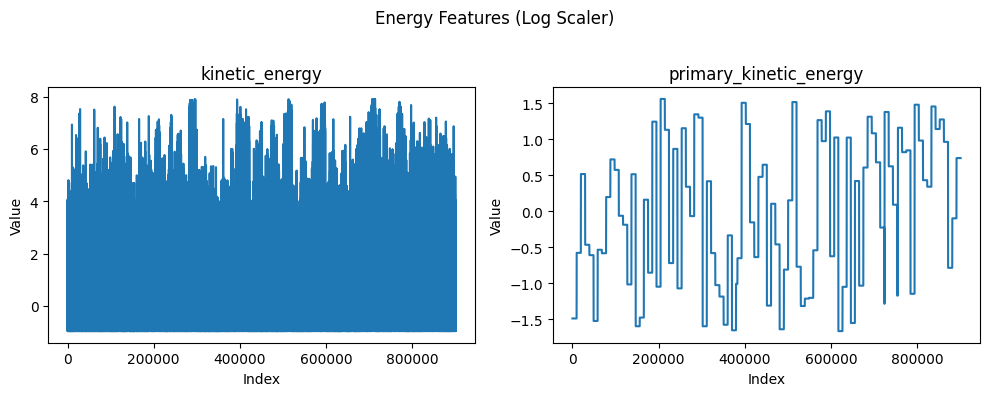

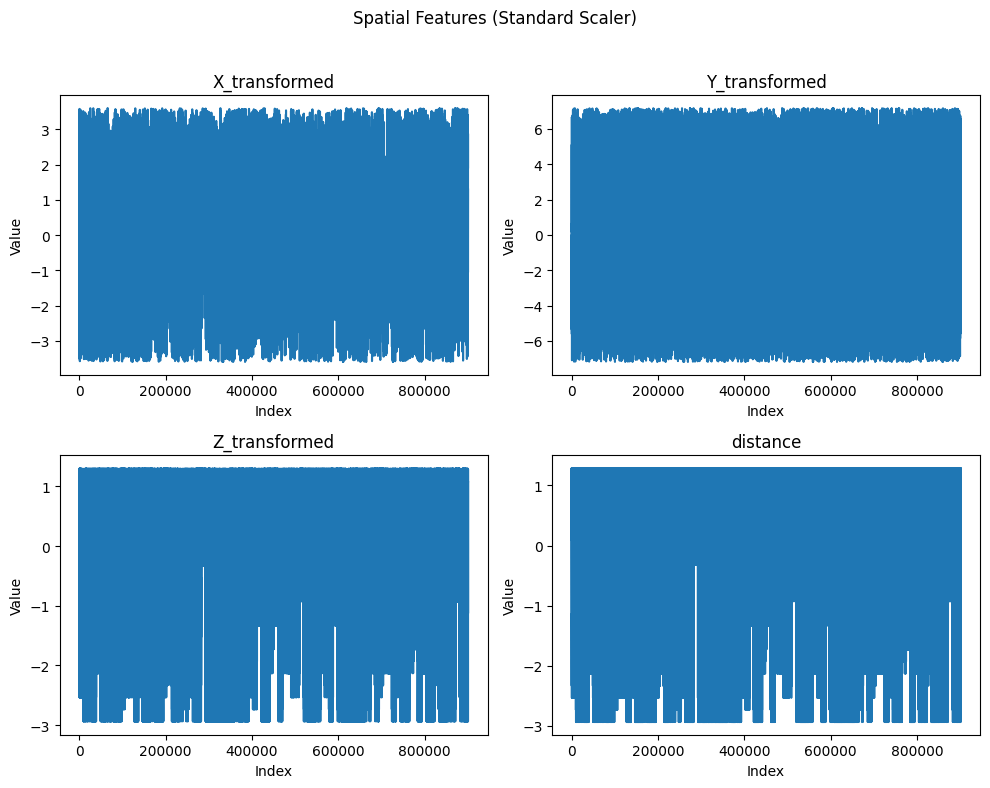

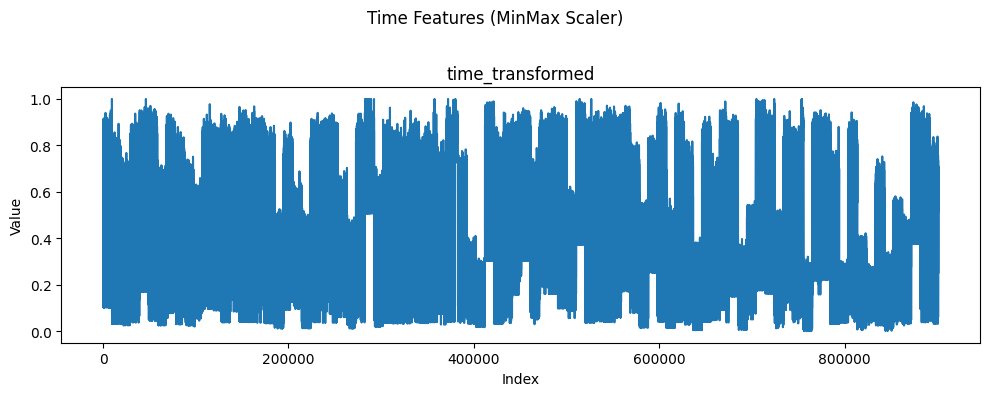

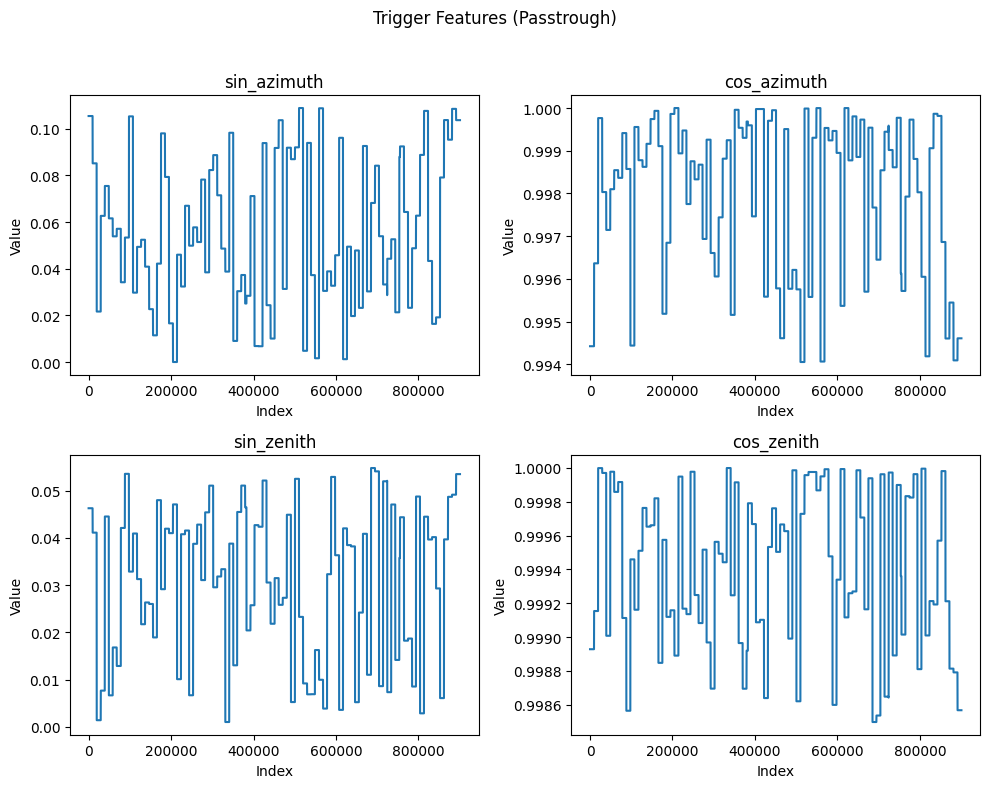

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_parquet('../ml/processed_events/normalized_features.parquet')

energy_features = ["kinetic_energy", "primary_kinetic_energy"]
spatial_features = ["X_transformed", "Y_transformed", "Z_transformed", "distance"]
time_features = ["time_transformed"]
trig_features = ["sin_azimuth", "cos_azimuth", "sin_zenith", "cos_zenith"]

groups_of_columns_to_plot = [energy_features, spatial_features, time_features, trig_features]
figure_names = ["Energy Features (Log Scaler)", "Spatial Features (Standard Scaler)", "Time Features (MinMax Scaler)", "Trigger Features (Passtrough)"]

# plot each group in a separate figure
for group, name in zip(groups_of_columns_to_plot, figure_names):
    num_features = len(group)
    ncols = min(2, num_features)
    nrows = int(np.ceil(num_features / ncols))
    
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))
    # name after scaler
    fig.suptitle(name)
    axes = axes.flatten() if num_features > 1 else [axes]
    
    for idx, col in enumerate(group):
        axes[idx].plot(df[col], label=col)
        axes[idx].set_title(col)
        axes[idx].set_xlabel('Index')
        axes[idx].set_ylabel('Value')
    # Hide unused subplots
    for idx in range(num_features, len(axes)):
        axes[idx].axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


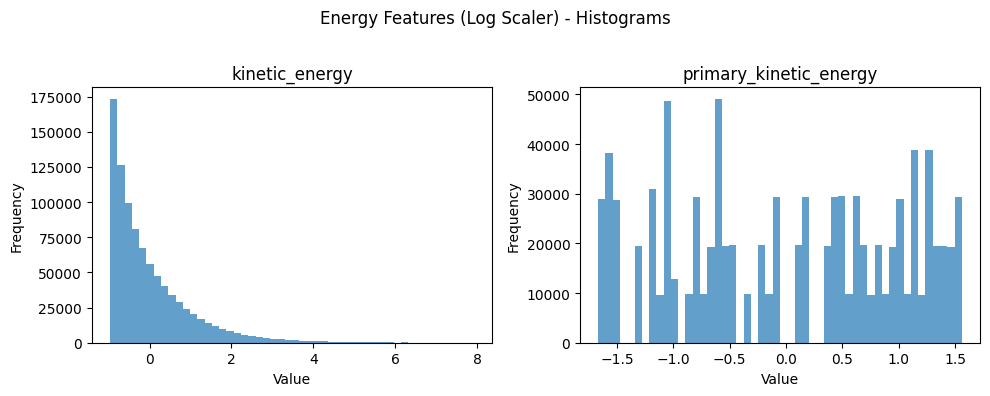

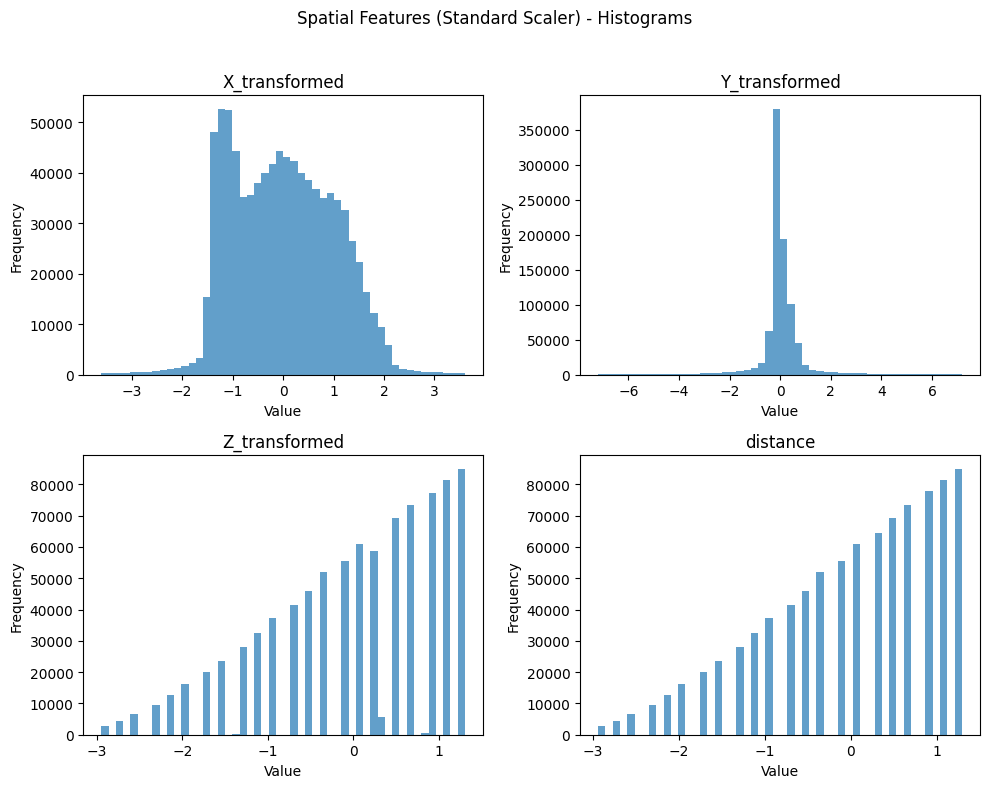

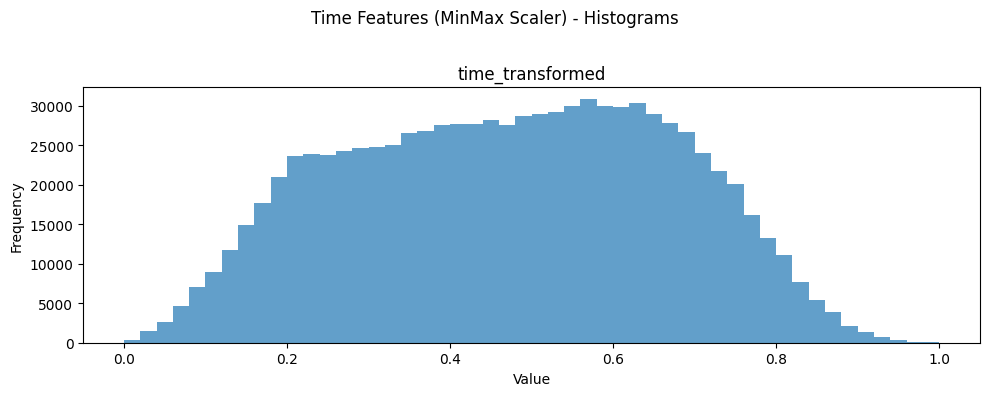

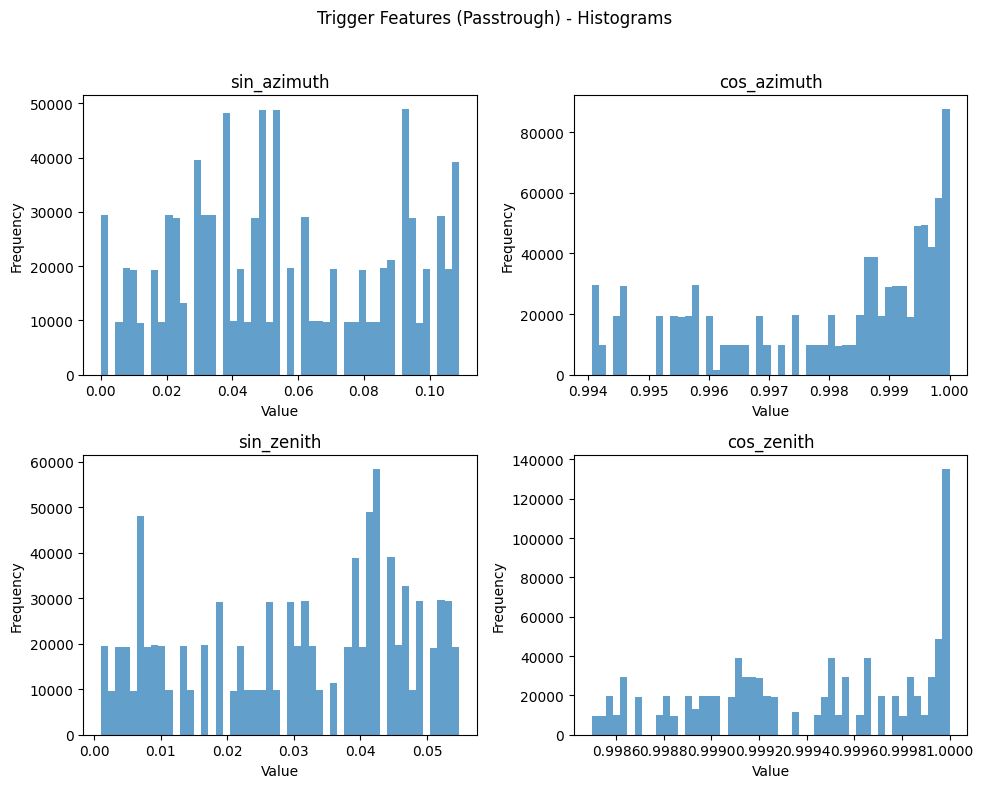

In [10]:
# plot histograms for each feature group
for group, name in zip(groups_of_columns_to_plot, figure_names):
    num_features = len(group)
    ncols = min(2, num_features)
    nrows = int(np.ceil(num_features / ncols))
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))
    fig.suptitle(f"{name} - Histograms")
    axes = axes.flatten() if num_features > 1 else [axes]
    
    for idx, col in enumerate(group):
        axes[idx].hist(df[col], bins=50, alpha=0.7)
        axes[idx].set_title(col)
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
    for idx in range(num_features, len(axes)):
        axes[idx].axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()